# Creating Functions

In this and the NumPyArrays notebook I deliberately started a new cell for almost everything I did.
That was so that you could see how things developed,
and so that we could go back and review the steps easily.
In real use of a Notebook I would be much more likely to type a bunch of code into a cell,
run the cell to see if I got the result I wanted
(or a step towards the result),
and then go back and edit the cell again, and again, and again
until I got the the result that I wanted.

## Defining and Debugging a Function

In [9]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5/9)) + 273.15

In [10]:
print 'the freezing point of water is:', fahr_to_kelvin(32)
print 'the boiling point of water is:', fahr_to_kelvin(212)

the freezing point of water is: 273.15
the boiling point of water is: 373.15


In [3]:
((212 - 32) * (5/9)) + 273.15

273.15

In [4]:
((212 - 32) * (5/9))

0

In [5]:
5/9

0

Integer division!!!

Embrace the 21st century with:

In [6]:
from __future__ import division

In [7]:
5/9

0.5555555555555556

In [8]:
fahr_to_kelvin(212)

273.15

In [11]:
def kelvin_to_celcius(temp):
    return temp - 273.15

In [12]:
kelvin_to_celcius(0)

-273.15

## Composing a Function From Other Functions

This is a key concept in code re-use,
and good software design - 
write small, well-tested functions to do small parts of your task
and then build up to the big task by combining the small functions in bigger functions.
There can be many layers...

In [17]:
def fahr_to_celcius(temp):
    temp_k = fahr_to_kelvin(temp)
    result = kelvin_to_celcius(temp_k)
    return result

In [14]:
print 'freezeing point of water in Celcius:', fahr_to_celcius(32)

freezeing point of water in Celcius: 0.0


## Testing and Documenting a Function

In [18]:
def center(data, desired):
    return (data - data.mean()) + desired

In [19]:
import numpy as np

In [20]:
z = np.zeros((2, 2))

In [21]:
z

array([[ 0.,  0.],
       [ 0.,  0.]])

In [22]:
center(z, 3)

array([[ 3.,  3.],
       [ 3.,  3.]])

In [23]:
data = np.loadtxt(fname='inflammation-01.csv', delimiter=',')

In [24]:
center(data, 0)

array([[-6.14875, -6.14875, -5.14875, ..., -3.14875, -6.14875, -6.14875],
       [-6.14875, -5.14875, -4.14875, ..., -5.14875, -6.14875, -5.14875],
       [-6.14875, -5.14875, -5.14875, ..., -4.14875, -5.14875, -5.14875],
       ..., 
       [-6.14875, -5.14875, -5.14875, ..., -5.14875, -5.14875, -5.14875],
       [-6.14875, -6.14875, -6.14875, ..., -6.14875, -4.14875, -6.14875],
       [-6.14875, -6.14875, -5.14875, ..., -5.14875, -5.14875, -6.14875]])

In [25]:
centred = center(data, 0)

In [26]:
print centred.std(), data.std()

4.61383319712 4.61383319712


In [27]:
print centred.std() - data.std()

0.0


In [30]:
def center(data, desired):
    """Return a new array containing the original data
    centred aroudn the derisred value.
    
    Example: center([1, 2, 3], 0) -> [-1, 0, 1]
    """
    return (data - data.mean()) + desired

In [31]:
help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data
    centred aroudn the derisred value.
    
    Example: center([1, 2, 3], 0) -> [-1, 0, 1]



## Exercise: The `analyze()` Function

Creating a function that can plot min/mean/max lines for any data file:

In [33]:
%matplotlib inline

In [34]:
from matplotlib import pyplot as plt

In [39]:
def analyze(filename):
    """Display min, max & mean line plots for data in filename.
    """
    data = np.loadtxt(fname=filename, delimiter=',')
    plt.plot(data.min(axis=0))
    plt.plot(data.mean(axis=0))
    plt.plot(data.max(axis=0))
    plt.show()

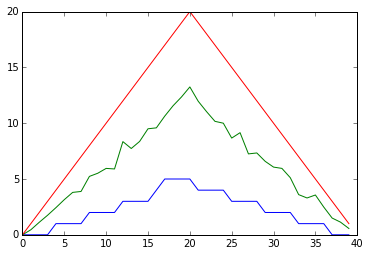

In [40]:
analyze('inflammation-01.csv')

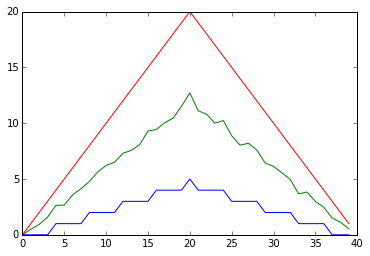

In [41]:
analyze('inflammation-02.csv')

## Loops

A *very* simple example.
Python lets you loop over all sorts of things...

In [42]:
vowels ='aeiou'

In [43]:
for char in vowels:
    print char

a
e
i
o
u


You could write a loop to count the number of characters in a string,
but it's such a common task that Python has a built-in statement,
`len()`,
for that.

In [44]:
len(vowels)

5

## Lists

Lists are ordered collections of things.

In [45]:
odds = [1, 3, 5, 7, 9]

In [47]:
for n in odds:
    print n,

1 3 5 7 9


In [48]:
odds[2] = 11

In [49]:
odds

[1, 3, 11, 7, 9]

In [50]:
odds.append(13)
odds

[1, 3, 11, 7, 9, 13]

There are lots of other methods availble to operate on lists;
see the "Analyzing Multiple Data Sets" notebook for more details.

One very useful list is a list of file names.
The `glob()` function in the `glob` module
(i.e. `glob.glob()`)
lets you create lists of file names using the same wildcard patterns
as we use in the shell.
"glob" is a [very old Unix term](http://en.wikipedia.org/wiki/Glob_%28programming%29).

In [51]:
import glob

In [52]:
print glob.glob('*.csv')

['inflammation-01.csv', 'inflammation-02.csv', 'inflammation-03.csv', 'inflammation-04.csv', 'inflammation-05.csv', 'inflammation-06.csv', 'inflammation-07.csv', 'inflammation-08.csv', 'inflammation-09.csv', 'inflammation-10.csv', 'inflammation-11.csv', 'inflammation-12.csv']


Plot all the files!!!

inflammation-01.csv


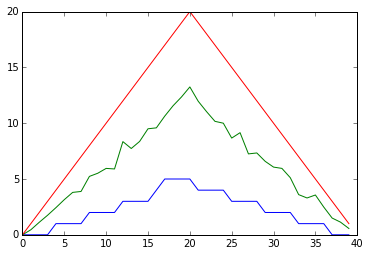

inflammation-02.csv


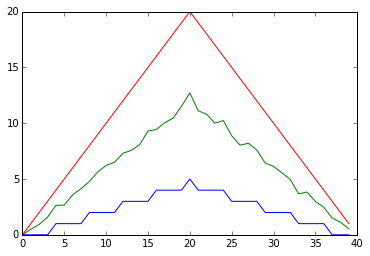

inflammation-03.csv


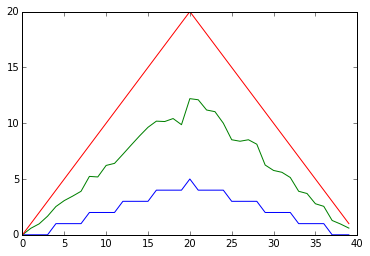

inflammation-04.csv


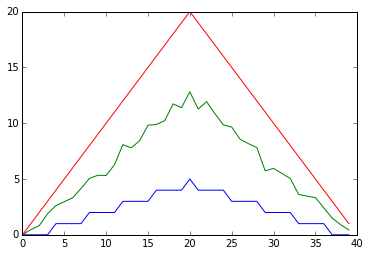

inflammation-05.csv


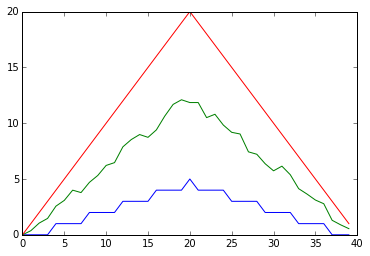

inflammation-06.csv


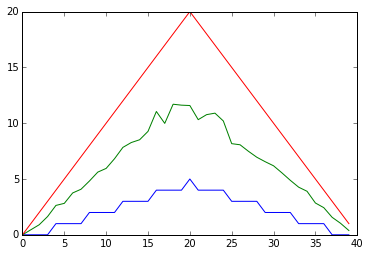

inflammation-07.csv


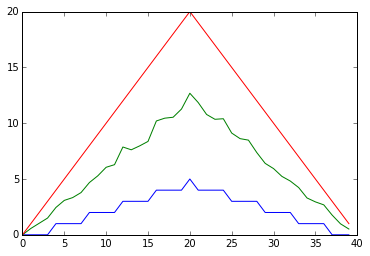

inflammation-08.csv


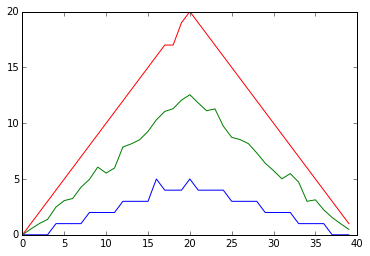

inflammation-09.csv


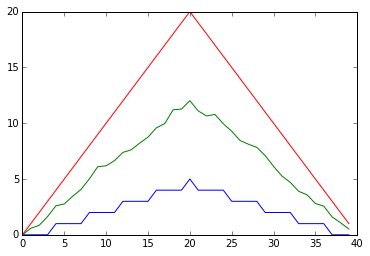

inflammation-10.csv


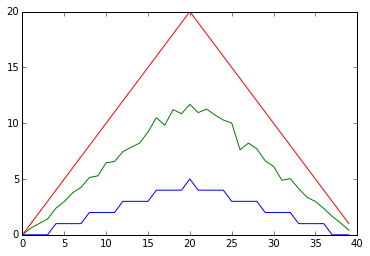

inflammation-11.csv


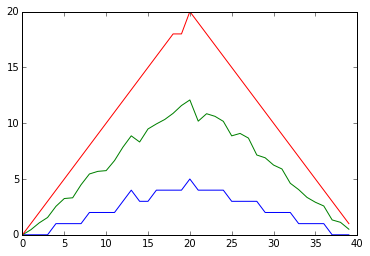

inflammation-12.csv


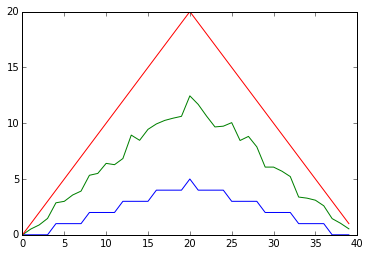

Done!


In [54]:
filenames = glob.glob('*.csv')
for filename in filenames:
    print filename
    analyze(filename)
print 'Done!'

It's hard to get an overall understanding of the data by looking at so many plots,
so let's get meta and calculate some statistics across all of the data files.

In [56]:
import numpy as np

In [58]:
def analyze_stats(filename):
    data = np.loadtxt(fname=filename, delimiter=',')
    return data.mean(axis=0), data.max(0), data.min(0)

In [60]:
datalen = 40
datamin = np.empty((len(filenames), datalen))
datamean = np.empty_like(datamin)
datamax = np.empty_like(datamin)

In [61]:
count = 0
for f in filenames:
    datamean[count], datamax[count], datamin[count] = analyze_stats(f)
    count = count + 1

The above uses a `count` variable that we initialize, then increment
each time through the loop.
Python can take care of those details for use via the `enumerate()` built-in function
that returns each item and an integer that increments upward from zero for each iteration.

In [62]:
for count, f in enumerate(filenames):
    datamean[count], datamax[count], datamin[count] = analyze_stats(f)

Heat maps are one way to look at the statistics from all of the data files.

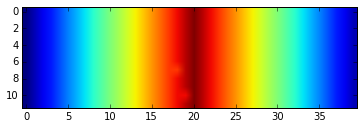

In [63]:
plt.imshow(datamax)

This is a big jump...

Here we're going to loop over all of our files
and check the max statistics to find suspicious values 
(a difference of *exactly* 1 - really!? - in biological data!?).
We'll use different symbols on the plot to show how that max values
in each data file differ from the overall max value.

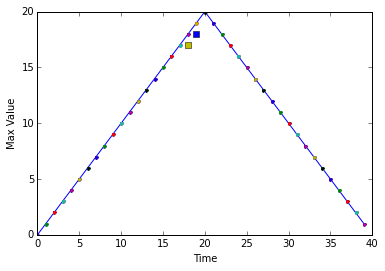

In [64]:
overallmax = data.max(0)
plt.plot(overallmax)
for count in range(len(filenames)):
    for time in range(datalen):
        if datamax[count, time] - overallmax[time] == -1:
            plt.plot(time, datamax[count, time], 's')
        elif datamax[count, time] < overallmax[time]:
            plt.plot(time, datamax[count, time], 'x')
        else:
            plt.plot(time, datamax[count, time], '.')
plt.xlabel('Time')
plt.ylabel('Max Value')
plt.show()

If we had had more time I would have pulled the code from the above cells 58
(the definition of the `analyze_stats()` function)
through 64
(the cell above that produced the plot)
into a function.
But now,
that's an exercise for you...

## Notebook "Magic" Commands

Or just "magics" for short.

There werw questions about them after people started leaving,
but I tried some things in the Notebook,
so,
here they are:

List all of the available magics:

In [65]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

Type a magic and the shift-tab to get it's docstring help message.

List all of the things (variables, functions, imports, etc.) defined in a notebook:

In [66]:
%who

analyze	 analyze_stats	 center	 centred	 char	 count	 data	 datalen	 datamax	 
datamean	 datamin	 division	 f	 fahr_to_celcius	 fahr_to_kelvin	 filename	 filenames	 glob	 
kelvin_to_celcius	 n	 np	 odds	 overallmax	 plt	 time	 vowels	 z	 



List more information about all of the things defined in a notebook:

In [69]:
%whos

Variable            Type                   Data/Info
----------------------------------------------------
analyze             function               <function analyze at 0x1050a57d0>
analyze_stats       function               <function analyze_stats at 0x10574f488>
center              function               <function center at 0x1032ef410>
centred             ndarray                60x40: 2400 elems, type `float64`, 19200 bytes
char                str                    u
count               int                    11
data                ndarray                60x40: 2400 elems, type `float64`, 19200 bytes
datalen             int                    40
datamax             ndarray                12x40: 480 elems, type `float64`, 3840 bytes
datamean            ndarray                12x40: 480 elems, type `float64`, 3840 bytes
datamin             ndarray                12x40: 480 elems, type `float64`, 3840 bytes
division            __future__._Feature    _Feature((2, 2, 0, 'alpha<...> 0, 

Return a list of the names of all of the things defined in the notebook:

In [70]:
%who_ls

['analyze',
 'analyze_stats',
 'center',
 'centred',
 'char',
 'count',
 'data',
 'datalen',
 'datamax',
 'datamean',
 'datamin',
 'division',
 'f',
 'fahr_to_celcius',
 'fahr_to_kelvin',
 'filename',
 'filenames',
 'glob',
 'kelvin_to_celcius',
 'n',
 'np',
 'odds',
 'overallmax',
 'plt',
 'time',
 'vowels',
 'z']